<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#6.1-Obtención-de-Políticas-Óptimas" data-toc-modified-id="6.1-Obtención-de-Políticas-Óptimas-1">6.1 Obtención de Políticas Óptimas</a></span><ul class="toc-item"><li><span><a href="#Dilema-Explotación-Exploración" data-toc-modified-id="Dilema-Explotación-Exploración-1.1">Dilema Explotación-Exploración</a></span></li><li><span><a href="#Monte-Carlo-para-la-tarea-de-Control" data-toc-modified-id="Monte-Carlo-para-la-tarea-de-Control-1.2">Monte Carlo para la tarea de Control</a></span></li><li><span><a href="#Política-Ɛ-greedy" data-toc-modified-id="Política-Ɛ-greedy-1.3">Política Ɛ-greedy</a></span></li><li><span><a href="#Hiperparámetro-decay-rate" data-toc-modified-id="Hiperparámetro-decay-rate-1.4">Hiperparámetro <em>decay rate</em></a></span></li></ul></li><li><span><a href="#6.2-Método-de-control-MC-constant-alpha" data-toc-modified-id="6.2-Método-de-control-MC-constant-alpha-2">6.2 Método de control MC constant-alpha</a></span><ul class="toc-item"><li><span><a href="#Media-incremental" data-toc-modified-id="Media-incremental-2.1">Media incremental</a></span></li><li><span><a href="#Constant-Alpha" data-toc-modified-id="Constant-Alpha-2.2">Constant-Alpha</a></span><ul class="toc-item"><li><span><a href="#Algoritmo:" data-toc-modified-id="Algoritmo:-2.2.1">Algoritmo:</a></span></li></ul></li></ul></li><li><span><a href="#6.3-Implementación-del-método-de-control-MC-constant-alpha" data-toc-modified-id="6.3-Implementación-del-método-de-control-MC-constant-alpha-3">6.3 Implementación del método de control MC constant-alpha</a></span><ul class="toc-item"><li><span><a href="#ε-decay" data-toc-modified-id="ε-decay-3.1"><em>ε-decay</em></a></span></li><li><span><a href="#Algoritmo" data-toc-modified-id="Algoritmo-3.2">Algoritmo</a></span><ul class="toc-item"><li><span><a href="#MC_control()" data-toc-modified-id="MC_control()-3.2.1">MC_control()</a></span></li><li><span><a href="#generate_episode_from_Q()" data-toc-modified-id="generate_episode_from_Q()-3.2.2">generate_episode_from_Q()</a></span></li><li><span><a href="#update_Q()" data-toc-modified-id="update_Q()-3.2.3">update_Q()</a></span></li></ul></li></ul></li><li><span><a href="#6.4-Obteniendo-π*-y-la-función-Q" data-toc-modified-id="6.4-Obteniendo-π*-y-la-función-Q-4">6.4 Obteniendo π* y la función Q</a></span><ul class="toc-item"><li><span><a href="#6.4.1-Visualizando-la-función-V" data-toc-modified-id="6.4.1-Visualizando-la-función-V-4.1">6.4.1 Visualizando la función V</a></span></li></ul></li><li><span><a href="#6.5-Evaluando-el-agente" data-toc-modified-id="6.5-Evaluando-el-agente-5">6.5 Evaluando el agente</a></span></li></ul></div>

## 6.1 Obtención de Políticas Óptimas
---

Anteriormente, hemos aprendido cómo un agente, empleando una aproximación MonteCarlo, puede seguir una política para interactuar múltiples episodios con un entorno y, a partir de los resultados, estimar el valor de las funciones **V** y **Q**.

<br/>

La cuestión que nos planteamos ahora es cómo podemos usar esa función Q en la **búsqueda de un política óptima**.

### Dilema Explotación-Exploración
---
Uno de los desafíos del aprendizaje por refuerzo es el compromiso entre explotación y exploración. Para obtener una gran recompensa, un agente prefiere acciones que sabe que son efectivas (las de mayor valor estimado). Es lo que denominamos una estrategia **_greedy_** o **_explotación_**.
 
<br/>

Sin embargo, para descubrir acciones que sean potencialmente mejores, el agente tiene que "probar" acciones que no haya seleccionado anteriormente, renunciando a elegir la mejor acción posible entre las que conoce. Es lo que denominamos **_exploración_**.

<br/>

Al final, se trata de equilibrar  estos dos requisitos en competencia.

<br/>

Una de las limitaciones de usar el método de predicción MC para calcular el valor Q es que es posible que algunos pares estado-acción no se visiten, por lo que no se tendrán en cuenta en la tarea de control donde se buscará la política óptima. 

<br/>

Una forma de solucionar este problema es asignando a cada par una probabilidad distinta de 0 de ser seleccionado como comienzo (**_"exploring starts"_**). Sin embargo, no suele ser una aproximación realista cuando pretendemos garantizar el inicio desde todos los pares estado-acción posibles en un entorno real.

<br/>

Un enfoque alternativo más común es considerar políticas estocásticas con una probabilidad de selección distinta de 0 para cada acción. Básicamente consiste en la construcción de una política **_Ɛ-greedy_** que establezca un pequeña probabilidad de seleccionar al azar una acción (que puede ser o no la de mayor valor actual).

### Monte Carlo para la tarea de Control
---
Básicamente, el algoritmo se compone de dos pasos que se irán repitiendo. Primero, se buscará una estimación de la función Q a partir de la política actual y, a continuación, se construirá una nueva polica _Ɛ-greedy_ con respecto a la función Q estimada. Es decir, iterativamente se va calculando tanto una política como una función Q aproximada.

<br/>

- Paso 1: usar la política π para generar episodios y estimar la tabla Q. Esencialmente es aplicar el algoritmo de prediccióm MC

<br/>

- Paso 2: actualizar la política siendo _Ɛ-greedy_ con respecto a Q.

<br/>

Este algoritmo, denominado **método de control MC**, garantiza que nos aproximaremos a la política óptima siempre y cuando se ejecute durante el tiempo suficiente.

<br/>

![](mc_control.png)

<br/>

Vemos que, en la búsqueda de la política óptima π\*, el método alterna entre la **evaluación de la política** y la **mejora de la política**

<br/>

<img src="mc_control_ciclo.png" width="600"/>

<br/>





### Política Ɛ-greedy
---
Partiremos de políticas Ɛ-greedy donde el agente tienda a optar por la exploración y, gradualmente, iremos ajustando el valor de Ɛ. Teniendo esto en cuenta, la mejor política de partida será una política aleatoria equiprobable (**Ɛ=1**). A medida que realicemos nuevas iteraciones del proceso, el valor de Ɛ irá tendiendo a 0.

<br/>

La probabilidad de selección de una acción **a** en el estado **s** que **maximice** el valor de **Q(s,a)** según una política Ɛ-greedy (**acción greedy**), vendrá dada por:

<br/><center>
$1 - \epsilon + \frac{\epsilon}{|A(s)|}$
</center><br/>

donde **|A(s)|** indica el número de acciones que se pueden realizar en ese estado.

<br/>

A las **acciones no-greedy** se les asignará la mínima probabilidad de selección:

<br/><center>
$\frac{\epsilon}{|A(s)|}$
</center><br/>

Se puede comprobar que la suma de las probabilidades de todas las acciones posibles (greedy y no-greedy), nos dará **1**

<br/><center>
$(1 - \epsilon + \frac{\epsilon}{|A(s)|}) + (|A(s)| - 1)\times\frac{\epsilon}{|A(s)|} = (1 - \epsilon + \frac{\epsilon}{|A(s)|}) + (\epsilon - \frac{\epsilon}{|A(s)|}) = 1$
</center><br/>


### Hiperparámetro _decay rate_
---
Para garantizar que el método MC converja en la política óptima π*, debemos asegurarnos de que se cumplan dos condiciones: que cada par estado-acción se visite muchas veces (infinitamente, en teoría) y que la política converja en una política que sea _greedy_ con respecto a la estimación de la función de valor Q.

<br>Nos referimos a estas condiciones como **_Greedy in the Limit of Infinite Exploration_ (_GLIE_**) y que garantizan que el agente gradualmente explote más y explore menos.

<br>La forma habitual de satisfacer esta condición es partir de un valor **Ɛ=1** y disminuir lentamente este hiperparámetro a un valor pequeño próximo a 0 (Ɛ=0.05). Esto se consigue introduciendo un factor denominado **_decay rate (Ɛ-decay)_**, con un valor cercano a 1, que multiplicaremos por Ɛ en cada iteración.

<br>Debemos tener presente que el determinar el mejor valor de _Ɛ-decay_ es una cuestión de prueba y error.


## 6.2 Método de control MC constant-alpha
---

Como optimización del método propuesto, en lugar de realizar la evaluación de la política actual sobre gran número de episodios, se calculará la función Q sobre un **único episodio** en cada iteración.

### Media incremental
---
En este caso, aunque la política se actualiza antes que los valores de la tabla Q se aproxime con precisión a la función Q, esta estimación de "menor calidad" tiene suficiente información para ser utilizada para mejorar la política. Y esa nueva política podría usarse para generar el próximo episodio; y así sucesivamente.

<br>Veamos cómo formalizar esta optimizaciónm en el algoritmo. Sabemos que la media **μ<sub>k</sub>** de una secuencia x<sub>1</sub>, x<sub>2</sub>,... se puede calcular de forma incremental:

<center>
$\mu_{k}=\frac{1}{k}\sum_{j=1}^{k}x_{j}=\mu_{k-1}+\frac{1}{k}(x_{k}-\mu_{k-1})$
</center>

<br>Esto nos permite calcular de forma incremental la actualización de **Q(S<sub>t</sub>,A<sub>t</sub>)**, que es la media de todos los retornos en cada _time step t_:

<br>
<center>
$Q(S_{t},A_{t})\leftarrow Q(S_{t},A_{t}) + \frac{1}{N(S_{t},A_{t})}(G_{t}-Q(S_{t},A_{t}))$    
</center>

<br>En problemas no estacionarios, puede sernos útil olvidar episodios antiguos y considerar el factor 1/N(S<sub>t</sub>,A<sub>t</sub>) como una constante. Esto nos conduce a una versión del algoritmo de control MC llamada **constant-alpha**

### Constant-Alpha
---
El algoritmo de control **Monte Carlo constant-alpha** actualiza la política después de cada episodio (en lugar de esperar a la convergencia de Q después de muchos episodios).

<br>

![](mc_control_constant-alpha.png)

<br>

Durante el paso de evaluación de la política, el agente recopila **un único episodio** utilizando la política más reciente. A continuación recorre el episodio y, para cada **_timestep t_**, el par estado-accción correspondiente se modifica usando la ecuación:

<br>
<center>
$Q(S_{t},A_{t})\leftarrow Q(S_{t},A_{t}) + \alpha(G_{t}-Q(S_{t},A_{t}))$    
</center>

<br>La idea básica que hay detrás de la ecuación es considerar que tenemos una tabla **Q** donde el elemento **Q(S<sub>t</sub>,A<sub>t</sub>)** contiene la estimación del retorno esperado para ese par estado-acción. Si el retorno obtenido **G<sub>t</sub>** difiere del valor de **Q(S<sub>t</sub>,A<sub>t</sub>)**, "empujamos" el valor de **Q(S<sub>t</sub>,A<sub>t</sub>)** para que se aproxime al retorno obtenido. La magnitud del cambio está controlada por el hiperparámetro **_α_** o **_step size_** que indica la magnitud de la actualización en cada iteración del algoritmo de control.

<br>El valor de **_α_** debe estar en el rango **(0, 1)**. Un valor 0 implicaría que no se actualizaría el valor Q del par estado-acción (no se aprende). Un valor de 1 supone que el valor Q será siempre igual al último retorno obtenido.

<br>

#### Algoritmo:

<br><center>
<img src="algo-MC_constant-alpha_epsilon-decay.png" width="700"/>
</center>

## 6.3 Implementación del método de control MC constant-alpha
---

A diferencia de la implementación anterior, en que el agente tenía una política predefinida con la que generaba los episodios, con el nuevo algoritmo de control MC encontrará por si mismo una política óptima.

<br>El algoritmo lo definiremos en una función denominada **MC_control()** que, además de devolvernos la política, devolverá la función Q que usaremos para evaluar posteriormente la política encontrada.

<br>

```python
env = gym.make('Blackjack-v0')

NUM_EPISODES = 1000000
ALPHA = 0.02
EPS_DECAY = 0.9999965
GAMMA = 1.0

policy, Q = MC_control(env, NUM_EPISODES, ALPHA, EPS_DECAY, GAMMA)
```

<br>La **política** retornada consistirá en un **diccionario** donde la **clave** será un estado y el **valor** la acción elegida para dicho estado

<br>La **función Q** devuelta también será un **diccionario** donde la **clave** será un estado y el **valor** un vector con el valor estimado para cada posible acción (2 en este caso)

### _ε-decay_
---
El valor de **ε** deberá ir disminuyendo a medida que generamos nuevos episodios. Esto lo conseguimos mediante la aplicación del factor _```EPS_DECAY```_ al valor actual de _ε_ para cada nuevo episodio (hasta un valor mínimo para preservar cierto grado de exploración)

In [16]:
NUM_EPISODES = 1000000
EPS_START = 1.0
EPS_DECAY = 0.9999965
EPS_MIN = 0.05

epsilon = EPS_START
for episode in range(NUM_EPISODES + 1):
    epsilon = max(epsilon*EPS_DECAY, EPS_MIN)
    if episode % 1E5 == 0: print(f'Episode {episode:>7} -> epsilon {epsilon}')

Episode       0 -> epsilon 0.9999965
Episode  100000 -> epsilon 0.7046851916863968
Episode  200000 -> epsilon 0.4965829574224525
Episode  300000 -> epsilon 0.3499358813150294
Episode  400000 -> epsilon 0.24659549668667013
Episode  500000 -> epsilon 0.17377280305645773
Episode  600000 -> epsilon 0.12245554962615056
Episode  700000 -> epsilon 0.08629291448656881
Episode  800000 -> epsilon 0.060809551819579116
Episode  900000 -> epsilon 0.05
Episode 1000000 -> epsilon 0.05


### Algoritmo
---
Recordemos el algoritmo a a implementar:

<br>
<img src="algo-MC_constant-alpha_epsilon-decay.png"  width="600"/>
<br>

#### MC_control()
---

<br>En primer lugar inicializaremos la **tabla de la función Q**

<br>

```python
nA = env.action_space.n
Q = defaultdict(lambda: np.zeros(nA))
```

<br>A continuación, definiremos el bucle de generación de episodios:

<br>

```python
for episode in range(1, NUM_EPISODES):
```

<br>En cada iteración del bucle, antes de generar el episodio, actualizamos el nuevo valor de _ε_

<br>

```python
    epsilon = max(epsilon*EPS_DECAY, EPS_MIN)
```

<br>A continuación, ya se puede construit la **política _greedy_** con respecto a la estimación más reciente de Q y, con ella, generaremos un nuevo episodio. Todo esto lo haremos con la función **```generate_episode_from_Q```**

<br>

```python
    episode_generated = generate_episode_from_Q(env, Q, epsilon, nA)
```

<br>A partir del episodio generado, actualizaremos la **tabla Q**

<br>

```python
    Q = update_Q(env, episode_generated, Q, alpha, gamma)
```

<br>Tras la actualización de la función Q, generaremos la nueva política óptima, resultado de quedarse con la acción **_greedy_** en cada uno de los posibles estados

<br>

```python
policy = dict((state, np.argmax(actions)) for state, actions in Q.items())
```

<br>Así, nuestra función de control quedará como sigue:

In [2]:
import numpy as np
from collections import defaultdict

def MC_control(env, num_episodes, alpha, eps_decay, gamma, log=False):
    EPS_START = 1.0
    EPS_MIN = 0.05
    
    nA = env.action_space.n
    Q = defaultdict(lambda: np.zeros(nA))
    
    epsilon = EPS_START
    for episode in range(1, num_episodes + 1):
        # actualiza el valor de epsilon
        epsilon = max(epsilon*eps_decay, EPS_MIN)
        if episode % 25000 == 0: print(f'Episode {episode:>7} -> epsilon {epsilon}')
            
        # genera un nuevo episodio
        episode_generated = generate_episode_from_Q(env, Q, epsilon, nA)
        
        # actualiza la función Q
        Q = update_Q(env, episode_generated, Q, alpha, gamma)
    
    # actualiza la política
    policy = dict((state, np.argmax(actions)) for state, actions in Q.items())
    
    return policy, Q

<br>Debemos implementar ahora dos nuevas funciones, la encargada de generar los episodios (```generate_episode_from_Q```) y la encargada de actualizar la función Q a partir de un episodio (```update_Q```).

<br>

#### generate_episode_from_Q()
---

<br>Esta función generará un nuevo episodio a partir de una política _greedy_ con respecto al valor actual de Q y _ε_, que determina la probabilidad de explotar/explorar. En caso de que sea un estado no visitado anteriormente, todas las acciones serán equiprobables, por lo que se seleccionará una entre ellas de forma totalmente aleatoria.

<br>

```python
def get_probs(Q_s, epsilon, nA):
    """Define las probabilidades de las acciones para el estado.
    
    La acción de mayor valor tendrá probabilidad: 1 - epsilon + (epsilon / nA)
    El resto de acciones tendrán probabilidad: (epsilon / nA)
    """
    policy_s = np.ones(nA) * epsilon / nA
    max_action = np.argmax(Q_s)
    policy_s[max_action] = 1 - epsilon + (epsilon / nA)
    return policy_s

# obtención de las probabilidades del estado actual
probs = get_probs(Q[state], epsilon, nA)

# selección ε-greedy de la acción
action = np.random.choice(np.arange(nA), p=probs) if state in Q else env.action.sample()
```

<br>Así, el código de la función quedará como sigue:


In [3]:
def get_probs(Q_s, epsilon, nA):
    """Define las probabilidades de las acciones para el estado.
    
    La acción de mayor valor tendrá probabilidad: 1 - epsilon + (epsilon / nA)
    El resto de acciones tendrán probabilidad: (epsilon / nA)
    """
    policy_s = np.ones(nA) * epsilon / nA
    max_action = np.argmax(Q_s)
    policy_s[max_action] = 1 - epsilon + (epsilon / nA)
    return policy_s

def generate_episode_from_Q(env, Q, epsilon, nA):
    """Genera un nuevo episodio a partir de la función Q actual y una política ε-greedy."""
    episode = []
    state = env.reset()
    while True:
        probs = get_probs(Q[state], epsilon, nA)
        action = np.random.choice(np.arange(nA), p=probs) if state in Q else env.action.sample()
        next_state, reward, done, _ = env.step(action)
        episode.append((state, action, reward))
        state = next_state
        if done:
            break
    return episode

<br>

#### update_Q()
---

<br>Finalmente, nos quedará por actualizar el valor de la **función Q**

In [4]:
def update_Q(env, episode, Q, alpha, gamma):
    # desempaquetamos los datos del episodio
    states, actions, rewards = zip(*episode)
    
    for i, state in enumerate(states):
        old_Q = Q[state][actions[i]]
        G = sum(r*gamma**k for k,r in enumerate(rewards[i:]))
        Q[state][actions[i]] = old_Q + alpha*(G - old_Q)
    
    return Q

<br>

## 6.4 Obteniendo π\* y la función Q
---

<br>Vamos a aplicar el nuevo método de control para aproximar la función Q


In [5]:
import gym

NUM_EPISODES = 1000000
ALPHA = 0.02
EPS_DECAY = 0.9999965
GAMMA = 1.0

env = gym.make('Blackjack-v0')

policy, Q = MC_control(env, NUM_EPISODES, ALPHA, EPS_DECAY, GAMMA)

Episode   25000 -> epsilon 0.9162187313535097
Episode   50000 -> epsilon 0.8394567636830389
Episode   75000 -> epsilon 0.769126011047801
Episode  100000 -> epsilon 0.7046876580932001
Episode  125000 -> epsilon 0.6456480320986302
Episode  150000 -> epsilon 0.591554820870295
Episode  175000 -> epsilon 0.5419936075038418
Episode  200000 -> epsilon 0.49658469546888667
Episode  225000 -> epsilon 0.454980199692074
Episode  250000 -> epsilon 0.41686138135284057
Episode  275000 -> epsilon 0.38193620597337086
Episode  300000 -> epsilon 0.34993710609490075
Episode  325000 -> epsilon 0.3206189313997909
Episode  350000 -> epsilon 0.2937570705750348
Episode  375000 -> epsilon 0.26914573052838187
Episode  400000 -> epsilon 0.24659635977392935
Episode  425000 -> epsilon 0.22593620390846259
Episode  450000 -> epsilon 0.20700698211183946
Episode  475000 -> epsilon 0.1896636745318291
Episode  500000 -> epsilon 0.17377341126339715
Episode  525000 -> epsilon 0.15921445441072418
Episode  550000 -> epsilon 

### 6.4.1 Visualizando la función V
---

Ahora podemos obtener y visualizar el valor de la función V a partir de la función Q generada por el nuevo método

In [21]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

def plot_blackjack_values(V, angle=-120):
    def get_Z(x, y, usable_ace):
        if (x,y,usable_ace) in V:
            return V[x,y,usable_ace]
        else:
            return 0

    def get_figure(usable_ace, ax):
        x_range = np.arange(11, 22)
        y_range = np.arange(1, 11)
        X, Y = np.meshgrid(x_range, y_range)
        
        Z = np.array([get_Z(x,y,usable_ace) for x,y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)

        surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm, vmin=-1.0, vmax=1.0)

        ax.set_xlabel('Player\'s Current Sum')
        ax.set_ylabel('Dealer\'s Showing Card')
        ax.set_zlabel('State Value')
        ax.view_init(ax.elev, angle)
        ax.set_zlim(-1, 1);
        return surf

    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(212, projection='3d')
    ax.set_title('Usable Ace')
    surf = get_figure(True, ax)
    fig.colorbar(surf, shrink=0.5, aspect=15)
    plt.show()

    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(212, projection='3d')
    ax.set_title('No Usable Ace')
    surf = get_figure(False, ax)
    fig.colorbar(surf, shrink=0.5, aspect=15)
    plt.show()    


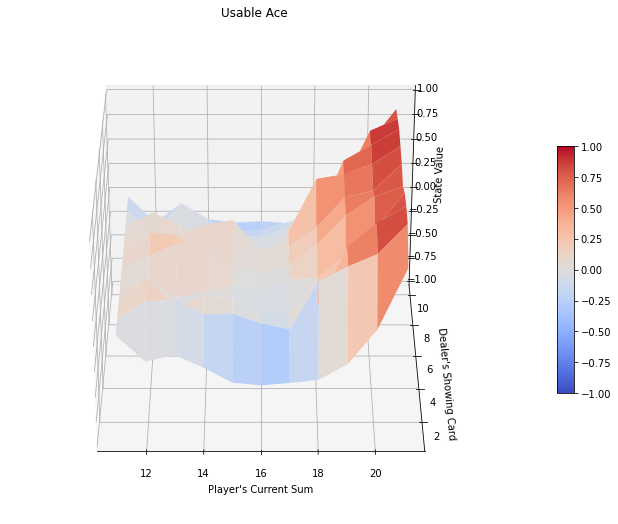

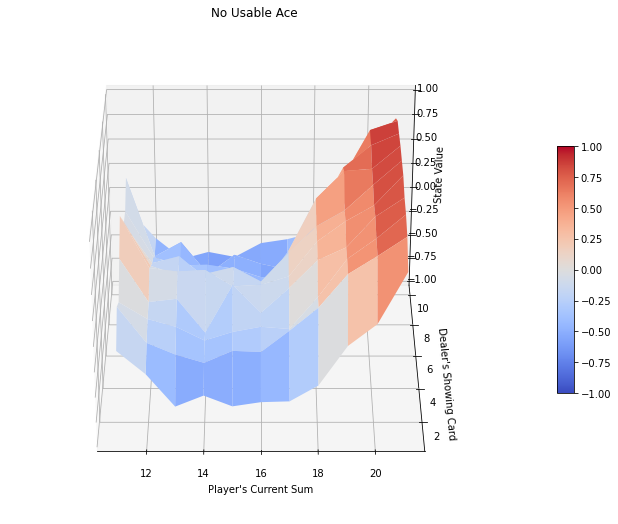

In [22]:
# Obtenemos la función V de cada estado a partir de la función Q
V = dict((state, np.max(actions)) for state, actions in Q.items())

# Generamos la gráfica
plot_blackjack_values(V, angle=-90)

<br>

## 6.5 Evaluando el agente
---

Una vez entrenado el agente, vamos a ponerlo a jugar unas cuantas partidas utilizando su **política óptima** y observar el resultado.

<br>Además, compararemos sus resultados con las políticas simples determinística y estocática vistas previamente

<br>Podremos apreciar, como era de esperar, que la **política óptima** ofrece mejores resultados

In [11]:
class Policy():
    def action(state, self):
        raise NotImplementedError("Please Implement this method")

class OptimalPolicy(Policy):
    def __init__(self, Q):
        self.policy = dict((state, np.argmax(actions)) for state, actions in Q.items())
    
    def action(self, state):
        return policy[state] if state in policy else 1    

class StochasticPolicy(Policy):
    def action(self, state):
        probs = [0.9, 0.1] if state[0] > 15 else [0.1, 0.9]
        return np.random.choice(np.arange(2), p=probs)

class DeterministicPolicy(Policy):
    def action(self, state):
        return 0 if state[0] > 19 else 1

def test_policy(policy, num_episodes = 100000):
    env = gym.make('Blackjack-v0')
    losing = 0.0
    winning = 0.0
    drawing = 0.0
        
    for i in range(num_episodes):
        state = env.reset()
        while True:
            action = policy.action(state)
            new_state, reward, is_done, _ = env.step(action)
            state = new_state
            if is_done:
                if reward == -1.0: losing += 1
                elif reward == 1.0: winning += 1
                else: drawing += 1
                break
    losing /= num_episodes
    winning /= num_episodes
    drawing /= num_episodes
    
    return losing, winning, drawing

print(f"{'POLICY':^15}{'LOSE':^6}{'WIN':^6}{'DRAW':^6}")

losing, winning, drawing = test_policy(DeterministicPolicy())
print(f"{'deterministic':<15}{losing:>6.3f}{winning:>6.3f}{drawing:>6.3f}")

losing, winning, drawing = test_policy(StochasticPolicy())
print(f"{'stochastic':<15}{losing:>6.3f}{winning:>6.3f}{drawing:>6.3f}")

losing, winning, drawing = test_policy(OptimalPolicy(Q))
print(f"{'optimal':<15}{losing:>6.3f}{winning:>6.3f}{drawing:>6.3f}")

    POLICY      LOSE  WIN   DRAW 
deterministic   0.646 0.296 0.059
stochastic      0.530 0.386 0.084
optimal         0.481 0.429 0.090
